<a href="https://colab.research.google.com/github/kerndre/CCU-Forcasting/blob/main/1_DatasetCharacteristics/dataset_advanced_time_series_analysis_optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
---
#Setup


## Imports

In [1]:
# Import necessary libraries from Google Colab
from google.colab import drive
from google.colab import userdata
import os  # Provides a way of using operating system dependent functionality

# Libraries for handling data formats and compression
import json  # Library for parsing JSON (JavaScript Object Notation) data

# Libraries for data manipulation and numerical operations
import numpy as np  # Library for numerical operations
import pandas as pd  # Library for data manipulation and analysis

# Library for plotting graphs
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')  # Ignore warnings


## Connecting to Drive

In [2]:
# data path
data_path = '/content/drive/MyDrive/'

In [3]:
# Flushes the mounts, ensuring that all changes are written and the drive is safely unmounted
drive.flush_and_unmount()

# Mount the Google Drive to the specified path
drive.mount('/content/drive')

# Change the current working directory to the specified data path
os.chdir(data_path)

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


---
---
# **Dataset Characteristics**


The data is provided by a german radio company. The original data are log files from an online substream. A Log File contains information about one listener that logged into a stream. It shows in general the start and end time of the sessions, the duration, used device, and the adsduration if ads were played. Based on the start and end points of these logs, the numbers of concurrent sessions are calculated.

---
## Loading

In [4]:
# Set the loading version number
LOADING_VERSIONSNUMMER = 'v1.1'

# Retrieve the path to the project data using userdata
LOADING_PATH = userdata.get('ts_project_data_path')

# Define the name of the DataFrame file to be loaded
LOADING_DF_NAME = f'df_ts_ccu_{LOADING_VERSIONSNUMMER}'

# Define the name of the JSON file that contains the data types of the DataFrame
LOADING_DTYPES_DF_NAME = 'dtypes_' + LOADING_DF_NAME


In [5]:
# Load the dtypes (data types) from a JSON file

# Construct the full path to the JSON file containing the dtypes
dtypes_file_path = LOADING_PATH + '/' + LOADING_DTYPES_DF_NAME + '.json'

# Open the JSON file in read mode
with open(dtypes_file_path, 'r') as f:
    # Load the JSON content into a dictionary
    dtypes = json.load(f)


In [6]:
# Load the DataFrame from a CSV file
df_sl = pd.read_csv(
    LOADING_PATH + '/' + LOADING_DF_NAME + '.csv',  # Construct the full path to the CSV file
    dtype=dtypes,                                  # Specify the data types for each column
    parse_dates=['timestamp']                      # Tell pandas to parse the 'timestamp' column as dates
)


---
## IDA

In [7]:
df_sl

,timestamp,abs_ended_sessions,mean_duration_end,concurrent_sessions
0,2024-03-01 00:00:12,0,0,603
1,2024-03-01 00:00:13,0,0,603
2,2024-03-01 00:00:14,0,0,603
3,2024-03-01 00:00:15,0,0,603
4,2024-03-01 00:00:16,0,0,603
...,...,...,...,...
5270371,2024-04-30 23:59:55,1,0 days 23:18:07,939
5270372,2024-04-30 23:59:56,0,0,939
5270373,2024-04-30 23:59:57,0,0,939
5270374,2024-04-30 23:59:58,0,0,939


In [8]:
df_sl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270376 entries, 0 to 5270375
Data columns (total 4 columns):
 #   Column               Dtype         
---  ------               -----         
 0   timestamp            datetime64[ns]
 1   abs_ended_sessions   int64         
 2   mean_duration_end    object        
 3   concurrent_sessions  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 160.8+ MB


In [9]:
# first date
df_sl.timestamp.min()

Timestamp('2024-03-01 00:00:12')

In [10]:
# last date
df_sl.timestamp.max()

Timestamp('2024-04-30 23:59:59')

In [11]:
# sort time stamp
df_sl.sort_values('timestamp', inplace=True)

In [12]:
# checking nan values
df_sl.isna().sum()

timestamp              0
abs_ended_sessions     0
mean_duration_end      0
concurrent_sessions    0
dtype: int64

The first number of concurrent sessions the df contains is on the 1st of March 2024 at 00:00:12 (HH:MM:SS). The number to this time is 603.

The last sessions of this df is on the 30th of April 2024 at 23:59:59. The number of concurrent sessions to this time is 939.

The df has nur nan values.

---
## EDA

In [13]:
# sort time stamp
df_sl.sort_values('timestamp', inplace=True)

In [14]:
# set timestamp as index
df_sl.set_index('timestamp', inplace=True)

In [15]:
# create an example df for March
df = df_sl.loc['2024-03']

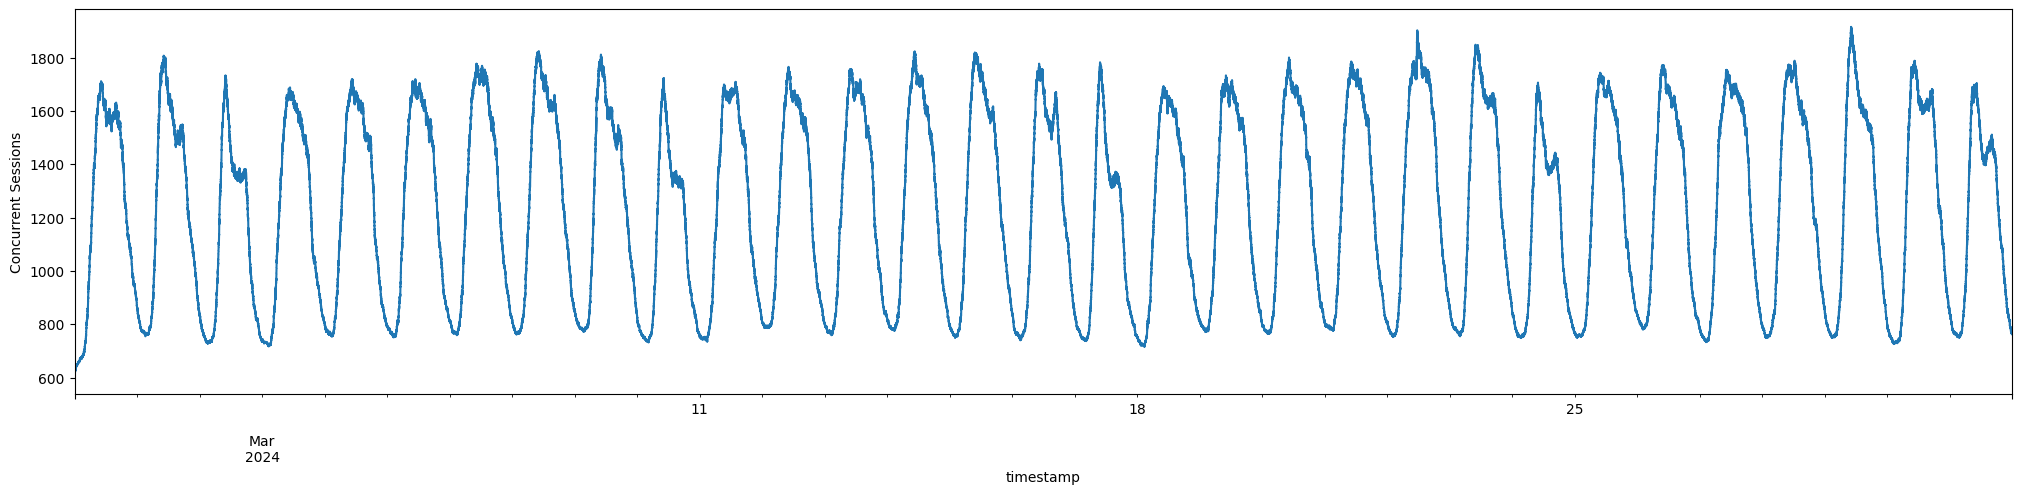

In [16]:
# plot the concurrent sessions of df (=for month March)
ax = df['concurrent_sessions'].plot(figsize=(25, 5))
ax.set_ylabel('Concurrent Sessions')
plt.show()

The plot shows the number of concurrent sessions over a period in March 2024. Here are some key observations:

1. **Time Period**: The x-axis represents the timestamp for the month of March 2024, indicating a daily time series.
2. **Concurrent Sessions**: The y-axis represents the number of concurrent sessions, ranging from approximately 600 to 1800 sessions.
3. **Pattern**: There is a clear repeating pattern that suggests a daily cycle. The number of concurrent sessions increases and decreases in a roughly sinusoidal manner over the course of each day.
4. **Peaks and Troughs**: The peaks generally reach around 1600-1800 sessions, while the troughs drop to about 600-800 sessions.
5. **Weekends vs. Weekdays**: There is a slight variation in the height of peaks and the depth of troughs which correspond to weekends and weekdays. Sundays can be identified, as they are the strongest right skewed peaks. Also, their peak is early in the day and dro on a plateu after that. For example, the third peak from left is a sunday.

The data appears to show regular daily fluctuations in concurrent sessions, suggesting a strong diurnal pattern likely influenced by user activity patterns over a typical day.

---
---
---